# ST590: Project 1

### Authors: George Bridges and Ashley Ko
### Date: 2/13/2022

#### Introduction
To Do: clean up this section

For this project we utilized python to explore used motorcycle listing data obtained from [Kaggle.com](https://www.kaggle.com/nehalbirla/motorcycle-dataset?select=BIKE+DETAILS.csv). The data set, `bikeDetails.csv`, was originally complied from [BIKEWALE](www.bikewale.com). It contains 7 variables: `name` (of motorcycle), `selling_price`, `year` (of motorcycle, not sale), `seller_type` (Individual or Dealer), `owner` (1st, 2nd, 3rd, or 4th owner), `km_driven`, `ex_showroom_price`. After processing the data appropriately, we performed exploratory data analysis to summarize the data. The results of which shaped the direction of our predictions of `selling_price`. We created algorithms to we predicted `selling_price` for grid search and gradient descent. 

#### Exploratory Data Analysis

##### Data frame creation

To begin, we first imported the libraries necessary for accomplishing our goals of exploratory analysis and prediction. We used `pandas`, `numpy`, `math`, and `scipy.stats`.

In [60]:
#Importing pandas as pd
import pandas as pd

#Importing numpy as np
import numpy as np

#Importing math
import math

#Importing scipy.stats as stats
import scipy.stats as stats

For reading in the "bikeDetails.csv", we used the pandas function `pd.read_csv` and saved the resulting data fram as "bike_data".

In [11]:
#Reading in bikeDetails data set using pandas
bike_data = pd.read_csv("bikeDetails.csv")

We used `.head()` to get a sense what the format looks like.

In [297]:
#Displays the first 5 observations from the bike_data data set
bike_data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


After observing the first 5 entries of "bike_data", we felt that the variables `seller_type`, `owner`, and `year` need additional modification for us to proceed. We converted both `seller_type` and`owner` to categorical variables using `.astype()` and created a new variable `year_cat` from the `year` variable using the `pandas` function `.cut()`. This new variable segmented year into nine, 4 year levels starting with 1986 and ending with 2021.

In [12]:
#Formating seller_type as a categorical variable
bike_data.seller_type = bike_data.seller_type.astype("category")
#Formating owner as a categorical variable
bike_data.owner = bike_data.owner.astype("category")
#Creating a new variable for year as a categorical variable in ranges of four years
bike_data['year_cat'] = pd.cut(bike_data.year,
                               bins = [1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
                               right = False, include_lowest = True)

##### Numeric and Graphical Summaries

In [300]:
bike_data['year_cat'].value_counts(dropna = False)

[2014, 2018)    431
[2010, 2014)    264
[2018, 2022)    220
[2006, 2010)    105
[2002, 2006)     23
[1998, 2002)     12
[1994, 1998)      3
[1990, 1994)      2
[1986, 1990)      1
Name: year_cat, dtype: int64

In [301]:
bike_data['seller_type'].value_counts(dropna = False)

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [302]:
bike_data['owner'].value_counts(dropna = False)

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

In [303]:
pd.crosstab([bike_data.seller_type, bike_data.year_cat], bike_data.owner, margins = True,
           dropna = False)

owner                     1st owner  2nd owner  3rd owner  4th owner     All
seller_type year_cat                                                        
Dealer      [1986, 1990)          0          0          0          0     NaN
            [1990, 1994)          0          0          0          0     NaN
            [1994, 1998)          0          0          0          0     NaN
            [1998, 2002)          0          1          0          0     1.0
            [2002, 2006)          0          0          0          0     NaN
            [2006, 2010)          0          1          0          0     1.0
            [2010, 2014)          2          0          0          0     2.0
            [2014, 2018)          2          0          0          0     2.0
            [2018, 2022)          0          0          0          0     NaN
Individual  [1986, 1990)          1          0          0          0     1.0
            [1990, 1994)          1          1          0          0     2.0
            [1994, 1998)          2          0          1          0     3.0
            [1998, 2002)          7          1          2          1    11.0
            [2002, 2006)         17          6          0          0    23.0
            [2006, 2010)         83         17          3          1   104.0
            [2010, 2014)        220         39          3          0   262.0
            [2014, 2018)        373         53          2          1   429.0
            [2018, 2022)        216          4          0          0   220.0
All                             924        123         11          3  1061.0

In [304]:
pd.crosstab(bike_data.year_cat, bike_data.seller_type, dropna = True)
pd.crosstab(bike_data.year_cat, bike_data.owner, dropna = True)
#pd.crosstab(bike_data.seller_type, bike_data.owner, dropna = True)

owner,1st owner,2nd owner,3rd owner,4th owner
year_cat,,,,
"[1986, 1990)",1,0,0,0
"[1990, 1994)",1,1,0,0
"[1994, 1998)",2,0,1,0
"[1998, 2002)",7,2,2,1
"[2002, 2006)",17,6,0,0
"[2006, 2010)",83,18,3,1
"[2010, 2014)",222,39,3,0
"[2014, 2018)",375,53,2,1
"[2018, 2022)",216,4,0,0


In [305]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["seller_type"], aggfunc = ("min", "max", "mean", "std")).round(2)
# pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
#               index = "owner", aggfunc = ["mean", "std", "q25", "median", "q75"])

ex_showroom_price                              km_driven  \
                          max      mean      min       std       max   
seller_type                                                            
Dealer               118997.0  88536.00  61600.0  28860.41    100000   
Individual          1278000.0  87955.93  30490.0  77666.00    880000   

                                      selling_price                             
                 mean   min       std           max      mean    min       std  
seller_type                                                                     
Dealer       35258.83  5500  37470.92         80000  46666.67  15000  25734.54  
Individual   34354.72   350  51705.46        760000  59711.92   5000  56427.96

In [306]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["owner"], aggfunc = ("min", "max", "mean", "std")).round(2)

ex_showroom_price                                 km_driven  \
                        max       mean       min        std       max   
owner                                                                   
1st owner          752020.0   84362.80   30490.0   54520.04    646000   
2nd owner         1278000.0  112554.65   42859.0  168949.65    340000   
3rd owner           84751.0   64611.00   44493.0   20129.01     70000   
4th owner          534000.0  534000.00  534000.0        NaN    880000   

                                      selling_price                    \
                mean   min        std           max       mean    min   
owner                                                                   
1st owner   32816.58   350   45870.37        760000   60022.81   5000   
2nd owner   39288.99  3500   35886.63        750000   55666.66   6000   
3rd owner   33292.18  5000   20934.50        150000   55727.27  20000   
4th owner  311500.00  6500  492772.51        330000  118333.33  10000   

                      
                 std  
owner                 
1st owner   51542.57  
2nd owner   81671.92  
3rd owner   38385.13  
4th owner  183325.76

In [307]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["year_cat"], aggfunc = ("min", "max", "mean", "std")).round(2)

ex_showroom_price                                km_driven  \
                           max       mean      min        std       max   
year_cat                                                                  
[1986, 1990)               NaN        NaN      NaN        NaN     21000   
[1990, 1994)               NaN        NaN      NaN        NaN     35000   
[1994, 1998)               NaN        NaN      NaN        NaN    646000   
[1998, 2002)           54852.0   54852.00  54852.0        NaN     65000   
[2002, 2006)           54852.0   54852.00  54852.0       0.00    127000   
[2006, 2010)           85011.0   63979.61  42859.0   15628.84    880000   
[2010, 2014)         1278000.0   83425.72  37675.0  111236.26    500000   
[2014, 2018)          599000.0   85457.47  30490.0   57805.32    450000   
[2018, 2022)          752020.0  106332.10  48000.0   78601.96     70000   

                                          selling_price                    \
                   mean    min        std           max       mean    min   
year_cat                                                                    
[1986, 1990)   21000.00  21000        NaN         20000   20000.00  20000   
[1990, 1994)   22500.00  10000   17677.67        130000   68000.00   6000   
[1994, 1998)  237118.00  20000  354329.05        150000   61666.67  10000   
[1998, 2002)   35291.67   4000   22949.01         70000   25416.67   5000   
[2002, 2006)   48774.61  11000   29961.34         59000   16660.87   7500   
[2006, 2010)   64704.50   3500   99343.35        180000   26420.00   6000   
[2010, 2014)   45209.90   1900   50123.60        750000   39083.28  12000   
[2014, 2018)   29615.22   1200   32691.25        425000   62245.90  15000   
[2018, 2022)   11998.03    350   10715.46        760000  101485.49  30000   

                        
                   std  
year_cat                
[1986, 1990)       NaN  
[1990, 1994)  87681.24  
[1994, 1998)  76865.68  
[1998, 2002)  24257.93  
[2002, 2006)  10793.30  
[2006, 2010)  22912.10  
[2010, 2014)  50548.88  
[2014, 2018)  42670.33  
[2018, 2022)  72415.92

<AxesSubplot:xlabel='year'>

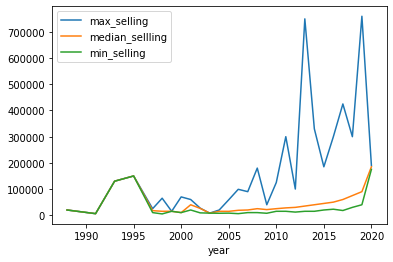

In [308]:
max_selling = bike_data.groupby("year")\
.agg(
    max_selling = ("selling_price", max), 
    median_sellling = ("selling_price", np.median),
    min_selling = ("selling_price", min), 
)
max_selling.plot.line()

array([[<AxesSubplot:xlabel='selling_price', ylabel='selling_price'>,
        <AxesSubplot:xlabel='year', ylabel='selling_price'>,
        <AxesSubplot:xlabel='km_driven', ylabel='selling_price'>,
        <AxesSubplot:xlabel='ex_showroom_price', ylabel='selling_price'>],
       [<AxesSubplot:xlabel='selling_price', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='km_driven', ylabel='year'>,
        <AxesSubplot:xlabel='ex_showroom_price', ylabel='year'>],
       [<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>,
        <AxesSubplot:xlabel='year', ylabel='km_driven'>,
        <AxesSubplot:xlabel='km_driven', ylabel='km_driven'>,
        <AxesSubplot:xlabel='ex_showroom_price', ylabel='km_driven'>],
       [<AxesSubplot:xlabel='selling_price', ylabel='ex_showroom_price'>,
        <AxesSubplot:xlabel='year', ylabel='ex_showroom_price'>,
        <AxesSubplot:xlabel='km_driven', ylabel='ex_showroom_price'>,
        <AxesSubplot:xlabel

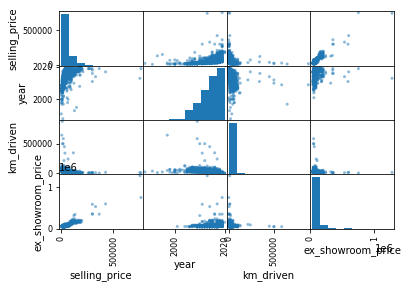

In [309]:
pd.plotting.scatter_matrix(bike_data)

## George's EDA

In [310]:
#using the .describe() method to get a first look at the numeric variables in the dataset. Although you would not necessarily perform math on the listed years for each bike, seeing info like the average year is meaningful.
bike_data.describe().round(2)

,selling_price,year,km_driven,ex_showroom_price
count,1061.00,1061.00,1061.00,626.00
mean,59638.15,2013.87,34359.83,87958.71
std,56304.29,4.30,51623.15,77496.59
min,5000.00,1988.00,350.00,30490.00
25%,28000.00,2011.00,13500.00,54852.00
50%,45000.00,2015.00,25000.00,72752.50
75%,70000.00,2017.00,43000.00,87031.50
max,760000.00,2020.00,880000.00,1278000.00


In [311]:
bike_data.columns
#note: our columns are name, selling_price, year, seller_type, owner, km_driven, and ex_showroom_price

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'year_cat'],
      dtype='object')

In [312]:
#bike_data_numeric = bike_data['selling_price', 'km_driven', 'ex_showrooom_price']

#previously I tried to do what I was doing above exactly in the way he does it
#in the video and got the same error

#Fixed to grab desired columns from bike_data for all rows
bike_data_numeric = bike_data.loc[:, ['selling_price', 'year', 'km_driven', 'ex_showroom_price']]


In [313]:
#finding mean and median of all the numeric variables using the .mean and .median methods
bike_data['selling_price'].mean()

59638.151743638075

In [314]:
bike_data['selling_price'].median()

45000.0

In [315]:
bike_data['km_driven'].mean()

34359.83317624882

In [316]:
bike_data['km_driven'].median()

25000.0

In [317]:
bike_data['ex_showroom_price'].mean()

87958.71405750798

In [318]:
bike_data['ex_showroom_price'].median()

72752.5

In [319]:
#similarly finding standard deviations of the numeric variables
bike_data.selling_price.std()

56304.29197302419

In [320]:
bike_data.km_driven.std()

51623.15270159632

In [321]:
bike_data.ex_showroom_price.std()

77496.5871894531

In [4]:
# #similarly finding more fine-tuned quantiles
# bike_data.selling_price.quantile(q = [.05, .10, .15, .20, .25,
#                                       .30, .35, .40, .45, .50,
#                                       .55, .60, .65, .70, .75,
#                                       .80, .85, .90, .95])

In [3]:
# bike_data.km_driven.quantile(q = [.05, .10, .15, .20, .25,
#                                   .30, .35, .40, .45, .50,
#                                   .55, .60, .65, .70, .75,
#                                   .80, .85, .90, .95])

In [2]:
#bike_data.ex_showroom_price.quantile(q = [.05, .10, .15, .20, .25,
                                          # .30, .35, .40, .45, .50,
                                          # .55, .60, .65, .70, .75,
                                          # .80, .85, .90, .95])

In [325]:
#interquartile range for selling_price
q1 = bike_data.selling_price.quantile(q = [.25])
q3 = bike_data.selling_price.quantile(q = [.75])
IQR_selling_price = q3[.75] - q1[.25]

42000.0

In [326]:
#finding correlation between the numeric variables in the data set
bike_data_numeric.corr().round(3)

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000,0.402,-0.213,0.919
year,0.402,1.000,-0.289,0.126
km_driven,-0.213,-0.289,1.000,-0.122
ex_showroom_price,0.919,0.126,-0.122,1.000


We see that selling_price and ex_showroom_price are highly correlated, in fact even more highly correlated than I anticipated or what it looked like from a cursory look at the data. They in fact boast a roughly 92% correlation with one another. Also, selling_price and km_driven are negatively correlated as one would expect (the more use a vehicle has the lower the price all else being equal). Insofar as it is meaningful the positive correlation shown between year and selling_price also makes sense because a larger number for year represents a newer vehicle. One might expect that until a bike is so old as to be considered a collector's item or an antique that an older bike would be worth less.

In [327]:
bike_data.drop(["year"], axis = 1).groupby("seller_type").mean().round(2)

,selling_price,km_driven,ex_showroom_price
seller_type,,,
Dealer,46666.67,35258.83,88536.00
Individual,59711.92,34354.72,87955.93


In [328]:
bike_data.drop(["year"], axis = 1).groupby("owner").mean().round(2)

,selling_price,km_driven,ex_showroom_price
owner,,,
1st owner,60022.81,32816.58,84362.80
2nd owner,55666.66,39288.99,112554.65
3rd owner,55727.27,33292.18,64611.00
4th owner,118333.33,311500.00,534000.00


We can see that dealers tend to sell their bikes for about 13,000 dollars less than individuals do as well as sell slightly older bikes that have been ridden a little farther. Very interestingly, in the second set of grouped means we see that by far the most lucrative sales occur by the 4th owner. Intuitively one might expect a bike that has been sold at least three times before might be worth less, but that is clearly not the case. This owner status, particularly in the case of "4th owner" could be a powerful predictive attribute.

In [329]:
bike_data.drop(["year"], axis = 1).groupby("year_cat").mean().round(2)

,selling_price,km_driven,ex_showroom_price
year_cat,,,
"[1986, 1990)",20000.00,21000.00,NaN
"[1990, 1994)",68000.00,22500.00,NaN
"[1994, 1998)",61666.67,237118.00,NaN
"[1998, 2002)",25416.67,35291.67,54852.00
"[2002, 2006)",16660.87,48774.61,54852.00
"[2006, 2010)",26420.00,64704.50,63979.61
"[2010, 2014)",39083.28,45209.90,83425.72
"[2014, 2018)",62245.90,29615.22,85457.47
"[2018, 2022)",101485.49,11998.03,106332.10


#### Prediction of Selling Price

##### Grid Search Algorithm

In this section we will implement a grid search to find the optimal value of c based off our data set.

The code below determines the best c value for *"Just y"*

C was selected to be within the IQR of selling_price

In [68]:
# To Do: Grid of c values selected from SLR  (y ~ intercept)

#Step 1.
def get_c_vals(y): #c grid goes here
    """
    Generate a series of c values for the response variable y
    y is aassumed to be a numpy array (1D) or Pandas series
    Data is assumed to have no missing values
    """
    q1 = bike_data.selling_price.quantile(q = [.25])
    q3 = bike_data.selling_price.quantile(q = [.75])
    c = pd.Series(range(int(q1[0.25]),int(q3[0.75]+1),100))
    return c


#Step 2. & 3. creates a squared error loss and rmse fuction
#outputs RMSE
def get_rmse_y(y, c):
    """
    Compute RMSE
    y is assumed to be a numpy array (1D) or Pandas series
    c is assumed to be an integer or float
    Data is assumed to have no missing values
    """
    sums = 0
    for i in range(0, len(y)):
        sums += (y[i] - c)**2
    return math.sqrt((1/len(y))*sums)


#Creating variables for conditional logic  
best_c = small_e = float(1000000)
# Note: I think we could used mappping here

#Step 4. Loop to apply the RMSE all values of c
def grid_search_y(y):
    """
    Calculate best prediction value with lowest RMSE
    y is assumed to be a numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    c = get_c_vals(y)
    global small_e
    global best_c
    for i in range(0, len(c)):
        e = get_rmse_y(y, c[i])
        if e < small_e:
            small_e = e
            best_c = c[i]
        else:
            continue
#Step 5. Returns the optimal_c value
prediction = grid_search_y(bike_data.selling_price)

#Step 6. Displays optimal c value and corresponding RMSE for selling_price
best_c
small_e
prediction

#Testing generalization of algorithm on km_driven
grid_search_y(bike_data.km_driven)

In [69]:
prediction

In [36]:
q1 = bike_data.selling_price.quantile(q = [.25])
q3 = bike_data.selling_price.quantile(q = [.75])

In [55]:
q1[0.25]

28000.0

*Using y and another numeric variable as x*
Repeating the grid search to included an explanatory variable *x*.
Here y is still selling_price but now we have included km_driven as x.

In [ ]:
#To Do: Grid of b0 and b1 values selected from SLR y ~ intercept + x
#


# Function to implement grid search
def rmse_yx(y, x, b0, b1):
    """
    Compute RMSE
    y, x, b0, and b1 are assumed to be numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    c = b0 + b1*x
    #Should read in all y values and apply
    #This to each y_i
    #Combines squared error loss with RMSE
    return sqrt(1/(len(y)) * sum((y[i] - c)**2))

#RMSE place holder object for conditional logic
small_e = float(inf)
best_b0 = best_b0 = 1


# Note: I think we could used mappping here

#Loop to apply the RMSE all values of b0 and b1
def grid_search_yx(y, x, b0, b1):
    """
    Find RMSE and select best b0 and b1 values
    y, x, b0, and b1 are assumed to be numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    for i in range(len(b0)):
        for j in range(len(b1)):
            e[i] = rmse_yx(y, x, b0[i], b1[j])
            if e < smallest:
                global small_e = e
                global best_b0 = b0[i]
                global best_b1 = b1[j]
                else:
                    continue
#Call for grid search for selling_price and km_driven
#Predicts selling_price for a given km_driven using optimal
#b0 and b1 values
def pred_yx(x):
    """
    Calculate the predicted response value
    x is assumed to be numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    return best_b0 + best_b1 * x

#Predicts selling_price for km_driven using the best b0 and best b1 values
pred_yx(10000)
pred_yx(25000)
pred_yx(35000)

##### Gradient Descent Algorithm

To Do: Add description

gradient descent algorithm for just y

In [ ]:
#Step 1. Create a squared error loss function
def sq_e_loss(y, c):
    """
    """
    return (y - c)**2

#Step 2. Create a RMSE function
def rmse(y, c):
    """
    """
    for i in range(y):
        sums += sq_e_loss(y[i], c)
    return sqrt((1/len(y))*sums)

#Step 3. Create a difference quotient
def dif_q(c, delta, y):
    """
    """
    a = rmse(y, (c+delta))
    b = rmse(y, c)
    return (a - b)/delta
#Step 4. - Step 8.
def grad_desc(y):
    #Sets need variables
    #These values are arbitrary and open to change
    #Tolerance level
    num_tol = 0.001
    #Step 4. Current c value
    cur_c = 1
    #Initiates attempt count for shut off element
    attempt = 1
    
    #Loop which performs grad desc for 1000 iterations
    while attempt < 1001:
        #Step 5.
        diff_quotient = dif_q(cur_c, 0.01, y)
        #Step 6.
        new_c = cur_c - diff_quotient * -0.01
        #Step 7. a
        if abs(new_c - cur_c) < num_tol:
            cur_c = new_c
            attempt = 1001
        #Step 7. b
        else:
            cur_c = new_c
            attempt += 1
    #Step 8.
    prediction = cur_c
    return prediction
#Reports prediction for selling_price using optimal c value
grad_desc(selling_price)
#Demonstrates generalization of algorithm
grad_desc(km_driven)       

gradient descent algorithm for just y and x

In [ ]:
#Setting global variables
est_b0 = 0
est_b1 = 0
#Step 1.
def sq_e_loss_yx(y, x, b0, b1):
    """
    """
    return (y - b0 - b1*x)**2
#Step 2.
def rmse_yx(y, x, b0, b1):
    """
    """
    for i in range(y):
        sums += sq_e_loss_yx(y[i], x[i], b0, b1)
    return sqrt((1/len(y))*sums)
#Step 3.
def dif_q_b0(y, x, b0, delta0, b1):
    """
    """
    a = rmse(y, x, (b0+delta0), b1)
    b = rmse(y, c)
    return (a - b)/delta0
#Step 4.
def dif_q_b1(y, x, b0, delta1, b1):
    """
    """
    a = rmse(y, x, b0, (b1+delta1))
    b = rmse(y, x, b0, b1)
    return (a - b)/delta1
#Steps 5. - 10.   
def grad_desc_yx(y, x):
    """
    """
    #Step 5. Picking starting values b0
    cur_b0, est_b0 = 1
    #Step 6. Picking starting values for b1
    cur_b1, est_b1 = 1
    #Setting step size for b0
    step_size_b0 = 0.01
    #Setting step size for b1
    step_size_b1 = 0.01
    #Euclidean distance tolerance level
    dist_tol = 0.001
    #Attempt counter for shut off of loop
    attempt = 1
    
    #Loops to find optimal b0 and b1 for 1000 iterations
    while attempt < 1001:
        #Step 6. 
        diff_quotient_b0 = dif_q_b0(y, x, cur_b0, 0.01, cur_b1)
        #Step 7.
        new_b0 = cur_b0 - diff_quotient_b0 * (-step_size_b0)
        
        
        #Step 8.
        diff_quotient_b1 = dif_q_b1(y, x, cur_b0, 0.01, cur_b1)
        #Step 9.
        new_b1 = cur_b1 - diff_quotient_b1 * (-step_size_b1)
        
        #Step 10 Calculating euclidean distance
        point1 = np.array((cur_b0, cur_b1))
        point2 = np.array((new_b0, new_b1))
    
        dist = np.linalg.norm(point1 - point2)
        #Checking to see if distance is within tolerance range
        if dist < dist_tol:
            cur_b0 = new_b0
            cur_b1 = new_b1
            attempt = 1001
        else:
            cur_b0 = new_b0
            cur_b1 = new_b1
            attempt += 1

    global est_b0 = cur_b0
    global est_b1 = cur_b1
#Step 11. Reports estimates
est_b0
est_b1

#Prediction
grad_desc(selling_price, 10000, est_b0, est_b1)
grad_desc(selling_price, 25000, est_b0, est_b1)
grad_desc(selling_price, 35000, est_b0, est_b1)

#### Conclusion